In [2]:
import pickle
import pandas as pd
with open('lda\lda_model_5.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']

with open('lda/topic_dict_5.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)

with open('model/id2word.pkl', 'rb') as f:
   id2word = pickle.load(f)

for each_doc in question_lda:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 5):
        each_doc.append((i, 0))
        i+=1
list_topic = []
for each_doc in question_lda:
    list_topic_each_doc = []
    for each_topic in each_doc:
        list_topic_each_doc.append(each_topic[1])
    list_topic.append(list_topic_each_doc)
list_topic

[[0.000850046, 0.14899914, 0.8487767, 0.00072229485, 0.0006518304],
 [0.001321779, 0.0016546557, 0.9948868, 0.0011231325, 0.0010135638],
 [0.00042290238, 0.86984557, 0.0005326496, 0.12887463, 0.00032428908],
 [0.0016677235, 0.0020877295, 0.9935486, 0.0014170862, 0.0012788404],
 [0.27949175, 0.0013227783, 0.0013308815, 0.54784733, 0.17000724],
 [0.0022746434, 0.18558887, 0.0028649569, 0.0019327939, 0.8073388],
 [0.0015346351, 0.43656614, 0.0019328792, 0.0013039989, 0.55866235],
 [0.0008266578, 0.53156984, 0.0010411865, 0.46592844, 0.000633896],
 [0.026393866, 0.00078500505, 0.9718074, 0.00053283817, 0.00048085643],
 [0.00087643525, 0.0010971569, 0.0011038758, 0.99625045, 0.0006720662],
 [0.62267095, 0.004396552, 0.00442345, 0.0029842353, 0.36552483],
 [0.33712292, 0.0069547202, 0.6469416, 0.004720654, 0.004260124],
 [0.9713897, 0.008676499, 0.008729606, 0.0058893445, 0.0053148014],
 [0.9950024, 0.0015156021, 0.0015248811, 0.0010287473, 0.0009283865],
 [0.52651525, 0.0015160929, 0.001525

In [3]:
distribution_0 = []
distribution_1 = []
distribution_2 = []
distribution_3 = []
distribution_4 = []

for topic_each_doc in list_topic:
    topic_each_doc.sort()
    distribution_0.append(topic_each_doc[4])
    distribution_1.append(topic_each_doc[3])
    distribution_2.append(topic_each_doc[2])
    distribution_3.append(topic_each_doc[1])
    distribution_4.append(topic_each_doc[0])

In [4]:
print(f"min_0 = {min(distribution_0)} max_0 = {max(distribution_0)}")
print(f"min_1 = {min(distribution_1)} max_1 = {max(distribution_1)}")
print(f"min_2 = {min(distribution_2)} max_2 = {max(distribution_2)}")
print(f"min_3 = {min(distribution_3)} max_3 = {max(distribution_3)}")
print(f"min_4 = {min(distribution_4)} max_4 = {max(distribution_4)}")


min_0 = 0.2936599850654602 max_0 = 0.9995588064193726
min_1 = 0.00014276988804340363 max_1 = 0.4986651837825775
min_2 = 6.059584848117083e-05 max_2 = 0.3228757381439209
min_3 = 6.0227055655559525e-05 max_3 = 0.206643208861351
min_4 = 4.0880346205085516e-05 max_4 = 0.12897001206874847


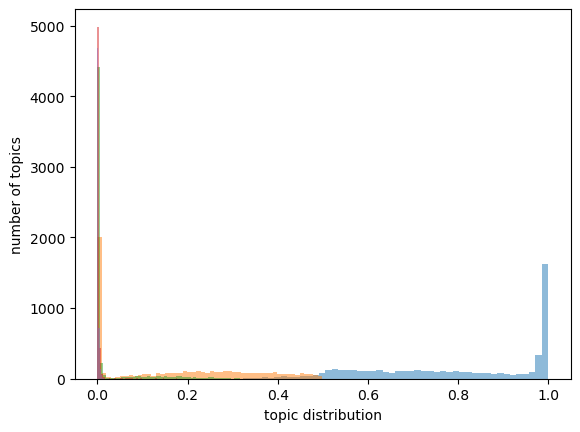

In [5]:
import matplotlib.pyplot as plt
num_bins = 50
label = ['0','1','2','3','4','5']
plt.hist(distribution_0, num_bins, alpha=0.5)
plt.hist(distribution_1, num_bins, alpha=0.5)
plt.hist(distribution_2, num_bins, alpha=0.5)
plt.hist(distribution_3, num_bins, alpha=0.5)
plt.hist(distribution_4, num_bins, alpha=0.5)
plt.xlabel('topic distribution')
plt.ylabel('number of topics')
plt.show()

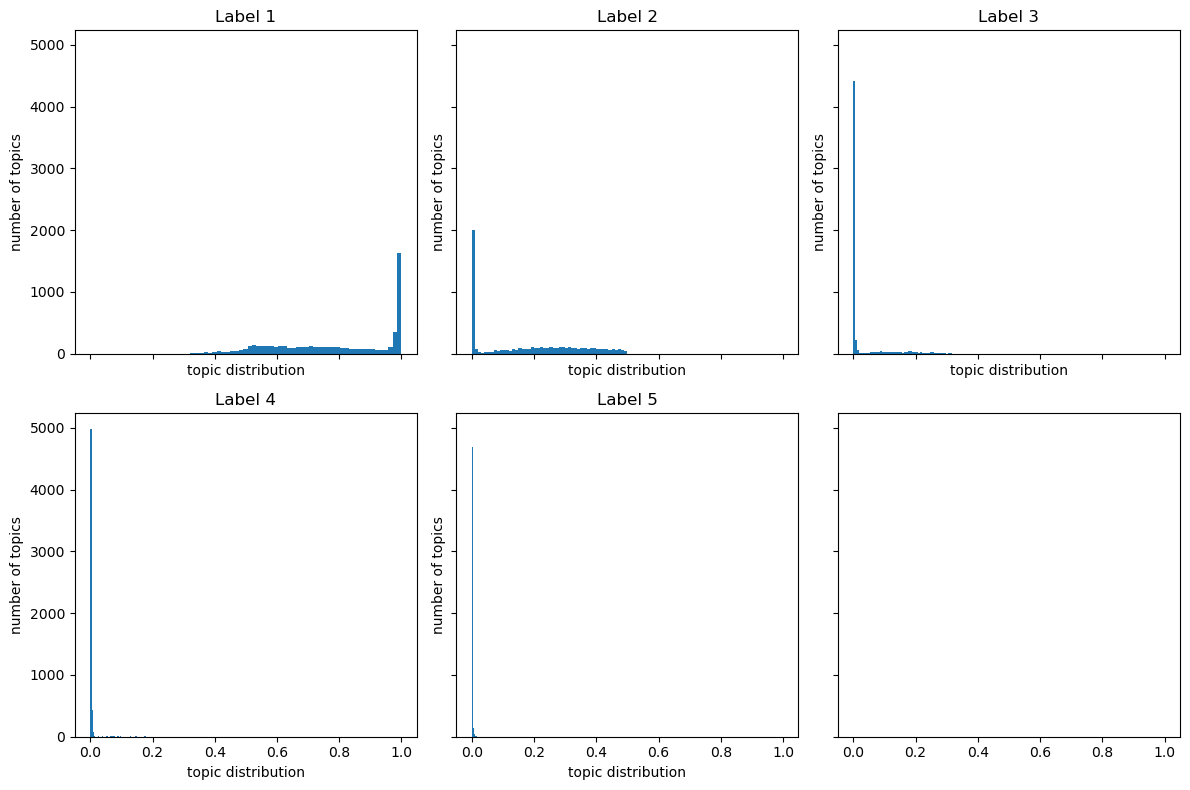

In [6]:
# Define the number of bins and labels
num_bins = 50
# labels = ['succession', 'violation', 'family', 'criminal', 'contract', 'labor']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True, sharex=True)

# Plot each histogram in a separate subplot
axes[0, 0].hist(distribution_0, num_bins)
axes[0, 0].set_xlabel('topic distribution')
axes[0, 0].set_ylabel('number of topics')
axes[0, 0].set_title('Label 1')

axes[0, 1].hist(distribution_1, num_bins)
axes[0, 1].set_xlabel('topic distribution')
axes[0, 1].set_ylabel('number of topics')
axes[0, 1].set_title('Label 2')

axes[0, 2].hist(distribution_2, num_bins)
axes[0, 2].set_xlabel('topic distribution')
axes[0, 2].set_ylabel('number of topics')
axes[0, 2].set_title('Label 3')

axes[1, 0].hist(distribution_3, num_bins)
axes[1, 0].set_xlabel('topic distribution')
axes[1, 0].set_ylabel('number of topics')
axes[1, 0].set_title('Label 4')

axes[1, 1].hist(distribution_4, num_bins)
axes[1, 1].set_xlabel('topic distribution')
axes[1, 1].set_ylabel('number of topics')
axes[1, 1].set_title('Label 5')


# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

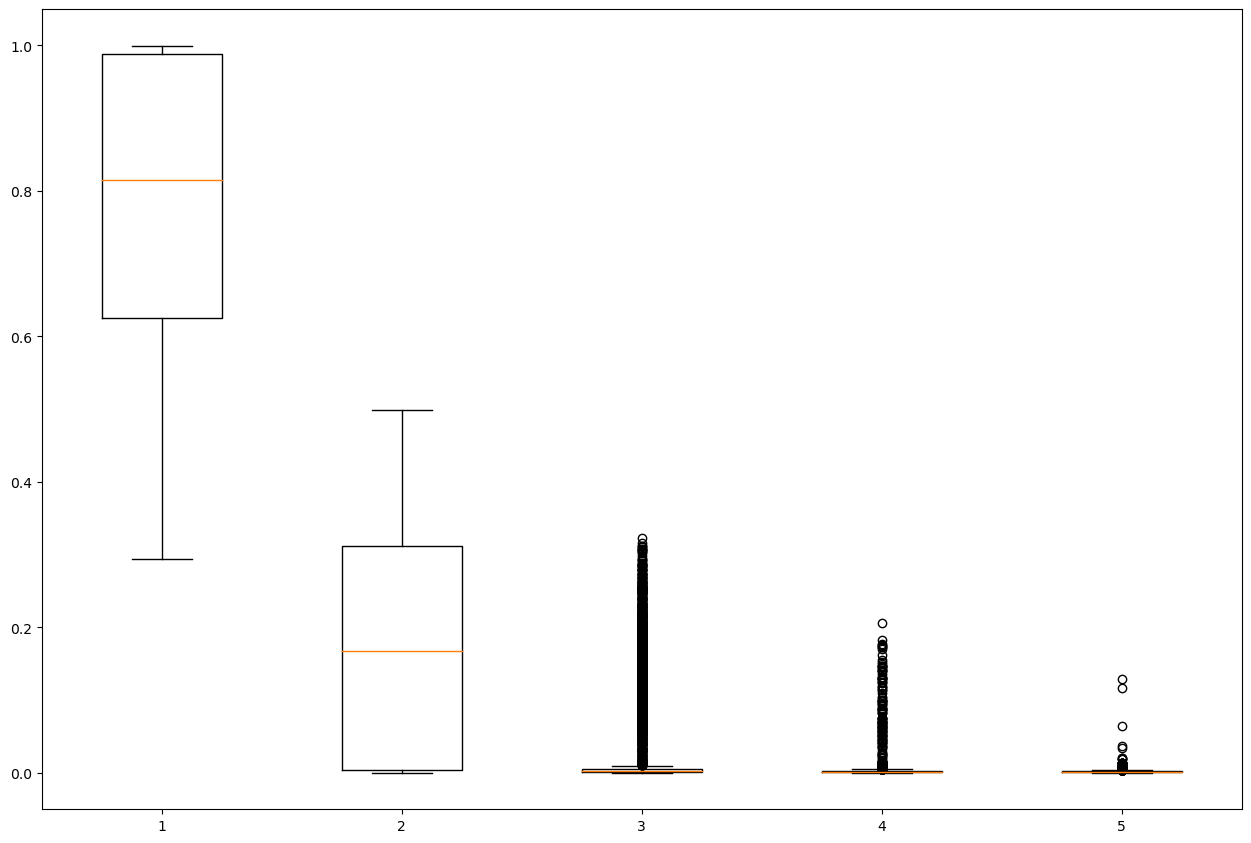

In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 1, 1])
data = [distribution_0, distribution_1, distribution_2, distribution_3, distribution_4]
bp = ax.boxplot(data)

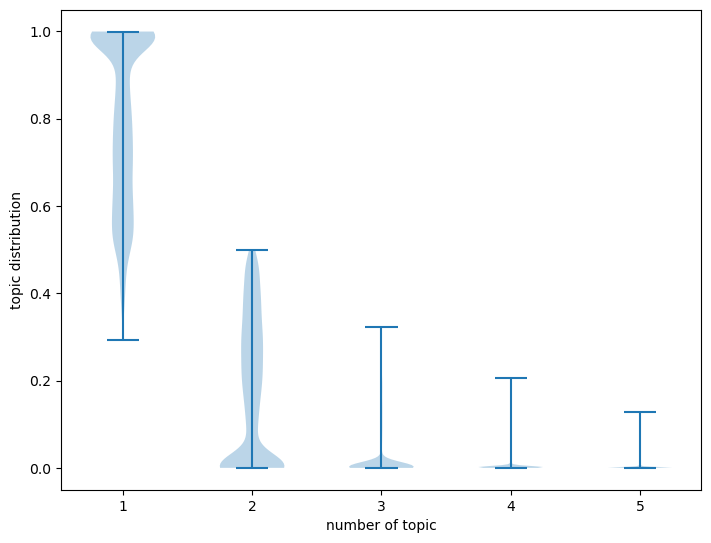

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
vp = ax.violinplot(data)
plt.xlabel('number of topic')
plt.ylabel('topic distribution')
plt.show()

In [23]:
# question_lda
num_top_topic = []
for each_doc in list_topic:
    count = 0
    for each_topic in each_doc:
        if(each_topic>0.2): count+=1
    num_top_topic.append(count)

count_num_top_topic = [0,0,0,0]
for n in num_top_topic:
    if(n==1): count_num_top_topic[0]+=1
    elif(n==2): count_num_top_topic[1]+=1
    elif(n==3): count_num_top_topic[2]+=1
    elif(n==4): count_num_top_topic[3]+=1
count_num_top_topic

[3108, 2306, 210, 1]

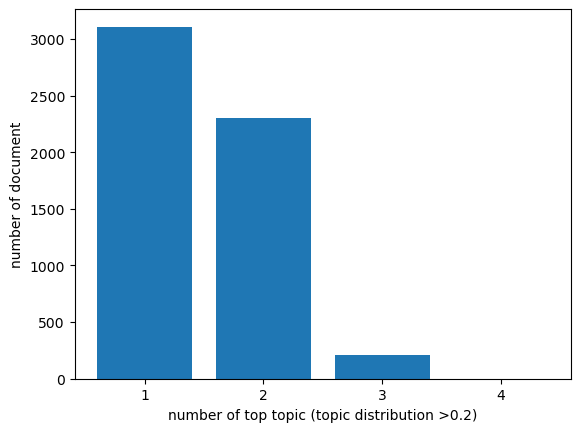

In [25]:
x = ['1','2','3','4']
y = count_num_top_topic
plt.bar(x, y)
plt.xlabel('number of top topic (topic distribution >0.2)')
plt.ylabel('number of document')
plt.show()

In [15]:
top_topic=[]
for each_topic in question_lda:
  temp_pred = []
  for topic in each_topic:
    if(topic[1]>0.167): temp_pred.append(1)
    else: temp_pred.append(0)
  top_topic.append(temp_pred)
# y_predict = np.array(y_predict)
pd.DataFrame(top_topic)

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,1,0,0,1,1
...,...,...,...,...,...
5620,1,1,0,1,0
5621,0,1,0,1,1
5622,0,0,0,1,1
5623,0,0,1,0,1


In [18]:
count_topic_doc = [0,0,0,0,0]
for each_topic in top_topic:
    for i in range(5):
        if(each_topic[i]==1): count_topic_doc[i]+=1
count_topic_doc

[1255, 1450, 1992, 2288, 1826]

<AxesSubplot:>

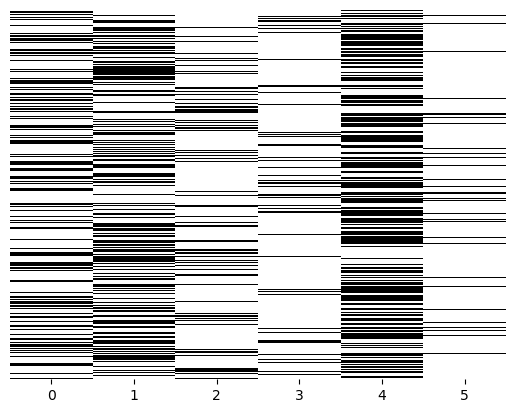

In [ ]:
import seaborn as sns
import numpy as np

data = np.array(top_topic)
sns.heatmap(data, cmap='Greys', xticklabels=['0', '1', '2', '3', '4', '5'], yticklabels=False, cbar=False)